<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [3]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [4]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [ ]:
import spacy
from gensim.parsing.preprocessing import STOPWORDS
from gensim.utils import simple_preprocess

nlp = spacy.load('en_core_web_md')

In [7]:
def tokenize(doc):
    # list comprehension method
    tokenized = [token for token in simple_preprocess(doc) if token not in STOPWORDS]
    return tokenized

In [8]:
yelp['tokenized'] = yelp['text'].apply(tokenize)
yelp['tokenized'].head()

0    [beware, fake, fake, fake, small, business, lo...
1    [came, lunch, togo, service, quick, staff, fri...
2    [ve, vegas, dozens, times, stepped, foot, circ...
3    [went, night, closed, street, party, best, act...
4    [stars, bad, price, lunch, seniors, pay, eatin...
Name: tokenized, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [11]:
# Simple vectorizer

vect = TfidfVectorizer(stop_words = 'english')

dtm = vect.fit_transform(yelp['text'].values)
dtm = pd.DataFrame(dtm.todense(),columns=vect.get_feature_names())
dtm.head()

,00,000,001695,007,00a,00am,00ish,00pm,01,011802,...,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.neighbors import NearestNeighbors

In [14]:
# Fit with Nearest Neighbors model

nn  = NearestNeighbors(n_neighbors=10, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=10, p=2, radius=1.0)

In [18]:
# Create bad fake review
bad_review = ['This restaurant is a bad place to eat: the service and food is bad']

# Transform text
bad_review_transformed = vect.transform(bad_review)

# Get 10 most similar to bad review
_, bad_indices = nn.kneighbors(bad_review_transformed.todense())

print(bad_review_transformed)

  (0, 21377)	0.23253263885812106
  (0, 20056)	0.3399934189801272
  (0, 18055)	0.21936416813185233
  (0, 9708)	0.22008194430799846
  (0, 8046)	0.37629126155234505
  (0, 2260)	0.7695331265934292


In [21]:
# Print 10 most simliar reviews to bad_review

yelp.iloc[bad_indices[0]]['text']

4599    only 1 word describes this place............. ...
2518    Don't waste your money. Bad management!!!  Bad...
8614    Worst food in Tempe and Phoenix. Every dish ha...
8134    Been eating here since they opened and I give ...
2990    1 star is what they deserved. No spinach, no s...
7398    The food is sooooo amazing! The prices aren't ...
508     The place is gorgeous but service is SLOW... A...
3808    Multiple pieces of rotten lettuce in my salmon...
1091    Absolutely shocked with how bad the food taste...
5391    It's good Chinese food. It's fresh and they ar...
Name: text, dtype: object

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
vectorizer = CountVectorizer(stop_words='english', min_df = 0.05, max_df= 0.90)
classifier = RandomForestClassifier()

In [28]:
# Define the pipeline.
pipe = Pipeline([('vect', vectorizer), 
                 ('clf', classifier)])

In [29]:
# Set parameters for gridsearch

parameters = {
    'vect__max_df': ( 0.75, 1.0),
    'vect__min_df': (.02, .05),
    'vect__max_features': (500,1000),
    'clf__n_estimators':(5, 10,),
    'clf__max_depth':(15,20)
}

In [30]:
# Fit pipeline with data

pipe.fit(yelp['text'], yelp['stars'])

/home/martin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.05,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
     ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [31]:
# Predict number of stars for fake bad review

print('Predicted star review from fake review: ', pipe.predict(bad_review))

Predicted star review from fake review:  [1]


In [32]:
# Tune pipeline with GridSearch 

grid_search = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(yelp['text'], yelp['stars'])

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.05,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
     ...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.75, 1.0), 'vect__min_df': (0.02, 0.05), 'vect__max_features': (500, 1000), 'clf__n_estimators': (5, 10), 'clf__max_depth': (15, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [33]:
grid_search.best_score_

0.5371

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [34]:
import gensim
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
from gensim import corpora
import os, sys, re

In [35]:
def review(df, tokens):
    """
    Generator function - takes a dataframe with a tokenized column and 
    yields a tokenized row for processing
    """
    
    for index, row in df.iterrows():
        token = row[tokens]
        yield token

In [36]:
id2word = corpora.Dictionary(review(yelp, 'tokenized'))

In [37]:
corpus = [id2word.doc2bow(rev) for rev in review(yelp, 'tokenized')]

In [42]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 6
                  )

In [47]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]
for id, t in enumerate(topics): 
    print(f"Topic {id}: ")
    print(t, end="\n\n")


Topic 0: 
place good food time service

Topic 1: 
food place great service like

Topic 2: 
good food great place time

Topic 3: 
food good place great service

Topic 4: 
food place great good like

Topic 5: 
place good great time food



In [48]:
# Define weightings for top ten words in each topic.
weights = [[float(f) for f in re.findall(r'([\d.]{5})', topic[1])] \
           for topic in lda.print_topics()]

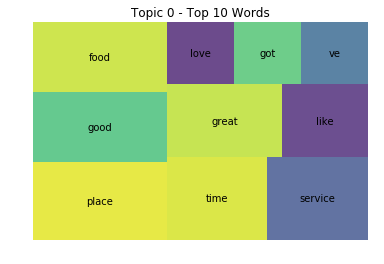

In [51]:
# Plot top 10 words for topic 0

import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=weights[0], label=words[0], alpha=0.8)
plt.axis('off')
plt.title('Topic 0 - Top 10 Words')
plt.show()

ANALYSIS OF TOPIC MODEL

Many reviews use generic terms like "food, good, great" to describe their experiences. The top 10 word lists don't provide much sensitive information.

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)